In [2]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [3]:
df_consumption=pd.read_csv('https://raw.githubusercontent.com/nsethi4310/CoffeeMLProject3/ryan_branch/domestic-consumption.csv')
df_consumption.head()

,domestic_consumption,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,20.0,30.0,35.0,20.00,25.0,10.0,20.0,40.0,30.0,...,30.000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
1,Bolivia (Plurinational State of),25.0,27.0,27.5,28.50,29.5,30.5,31.5,32.5,33.0,...,46.000,47.5,49.0,50.5,52.0,53.5,55.0,57.0,58.5,60.0
2,Brazil,8200.0,8500.0,8900.0,9100.00,9300.0,10100.0,11000.0,11500.0,12200.0,...,18390.000,19132.0,19720.0,20330.0,20085.0,20333.0,20508.0,21225.0,21997.0,22250.0
3,Burundi,2.0,1.6,1.7,1.91,2.0,2.0,2.0,2.0,2.0,...,1.399,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,Ecuador,350.0,350.0,350.0,350.00,350.0,350.0,300.0,300.0,300.0,...,150.000,150.0,150.0,150.0,155.0,155.0,155.0,155.0,155.0,155.0


In [4]:
df_consumption.columns

Index(['domestic_consumption', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [5]:
# df_consumption=df_consumption.rename(columns={ df_consumption.columns['0']: "Country"},inplace=True)
# df_consumption
df_consumption.rename(columns={"domestic_consumption": "Country"}, errors="raise")

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,20.000,30.000,35.000,20.000,25.000,10.000,20.000,40.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.0000,30.000,30.000
1,Bolivia (Plurinational State of),25.000,27.000,27.500,28.500,29.500,30.500,31.500,32.500,33.000,...,46.000,47.500,49.000,50.500,52.000,53.500,55.000,57.0000,58.500,60.000
2,Brazil,8200.000,8500.000,8900.000,9100.000,9300.000,10100.000,11000.000,11500.000,12200.000,...,18390.000,19132.000,19720.000,20330.000,20085.000,20333.000,20508.000,21225.0000,21997.000,22250.000
3,Burundi,2.000,1.600,1.700,1.910,2.000,2.000,2.000,2.000,2.000,...,1.399,2.000,2.000,2.000,2.000,2.000,2.000,2.0000,2.000,2.000
4,Ecuador,350.000,350.000,350.000,350.000,350.000,350.000,300.000,300.000,300.000,...,150.000,150.000,150.000,150.000,155.000,155.000,155.000,155.0000,155.000,155.000
5,Indonesia,1242.000,1280.000,1319.000,1359.000,1400.000,1443.000,1486.000,1532.000,1578.000,...,3333.000,3333.000,3667.000,3900.000,4250.000,4417.000,4550.000,4650.0000,4750.000,4800.000
6,Madagascar,350.000,300.000,350.000,360.000,166.666,167.000,167.000,167.000,167.000,...,467.000,467.000,450.000,430.000,410.000,390.000,370.000,360.0000,365.000,375.000
7,Malawi,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.000,1.000
8,Papua New Guinea,3.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,1.000,...,2.000,1.430,1.236,1.711,2.039,1.924,1.800,2.0000,2.000,2.000
9,Paraguay,15.000,15.000,15.000,20.000,20.000,20.000,20.000,20.000,20.000,...,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.0000,20.000,20.000


In [6]:
df_consumption.shape

(56, 30)

In [7]:
df_consumption.columns

Index(['domestic_consumption', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [8]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   domestic_consumption  56 non-null     object 
 1   1990                  56 non-null     float64
 2   1991                  56 non-null     float64
 3   1992                  56 non-null     float64
 4   1993                  56 non-null     float64
 5   1994                  56 non-null     float64
 6   1995                  56 non-null     float64
 7   1996                  56 non-null     float64
 8   1997                  56 non-null     float64
 9   1998                  56 non-null     float64
 10  1999                  56 non-null     float64
 11  2000                  56 non-null     float64
 12  2001                  56 non-null     float64
 13  2002                  56 non-null     float64
 14  2003                  56 non-null     float64
 15  2004                  56 

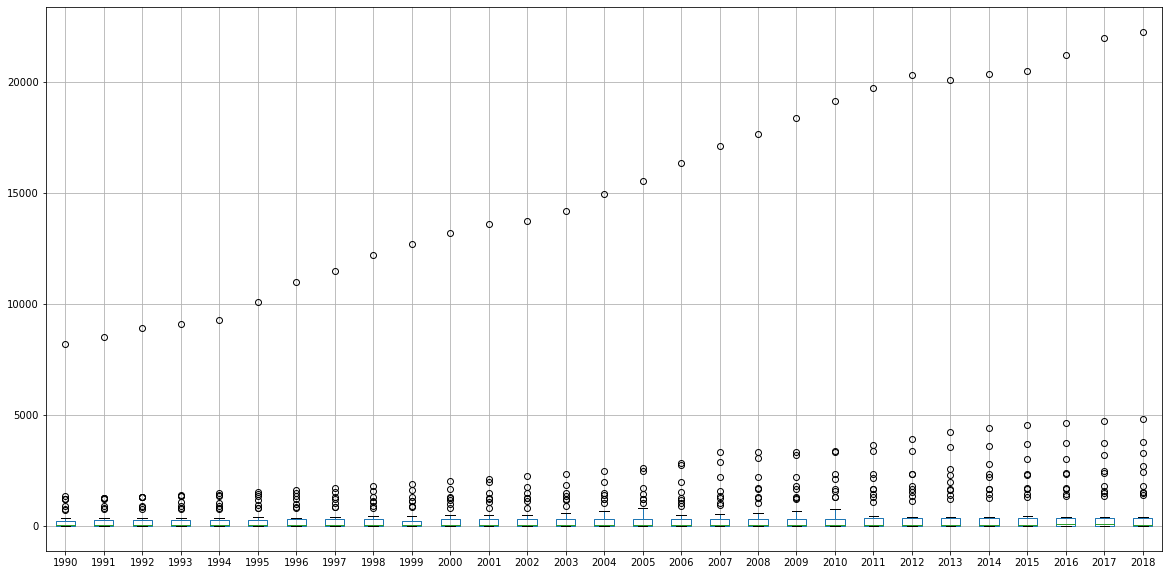

In [9]:
coffee_consumption_box_x = df_consumption[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018']]
coffee_consumption_box_x.boxplot(figsize=(20,10))

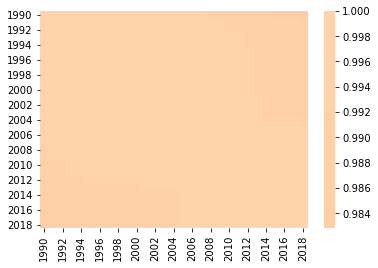

In [10]:
sns.heatmap(df_consumption.corr(), center = 0)

In [11]:
df_consumption.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,348.378768,361.216018,374.133071,376.748321,381.431536,403.617357,419.867679,433.411429,448.510589,459.664375,...,710.721857,747.467679,773.937179,799.169875,812.658464,833.315982,849.075000,865.860186,889.157429,901.958107
std,1125.643104,1162.474584,1217.037181,1241.586526,1269.362484,1375.387465,1493.907631,1559.898821,1651.773033,1719.932840,...,2518.169586,2621.676526,2704.583606,2790.084765,2773.346037,2815.019516,2845.100866,2940.267992,3043.713379,3081.604616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.916750,2.916750,2.750000,2.750000,2.750000,2.750000,3.000000,3.000000,2.750000,...,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000
50%,31.000000,42.875000,42.875000,36.500000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,58.500000,58.500000,62.975000,69.350000,70.233500,71.158500,71.500000,72.000000,72.500000,68.500000
75%,214.750000,267.825000,262.500000,277.750000,271.000000,288.883750,298.137000,300.000000,300.000000,247.500000,...,317.750000,340.000000,342.500000,348.750000,342.500000,361.250000,366.250000,345.000000,356.250500,367.500000
max,8200.000000,8500.000000,8900.000000,9100.000000,9300.000000,10100.000000,11000.000000,11500.000000,12200.000000,12700.000000,...,18390.000000,19132.000000,19720.000000,20330.000000,20085.000000,20333.000000,20508.000000,21225.000000,21997.000000,22250.000000


In [12]:
df_consumption.columns

Index(['domestic_consumption', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [13]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df_consumption[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']]
y = df_consumption["2018"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(56, 28) (56, 1)


In [14]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
scaler=StandardScaler()
### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [16]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

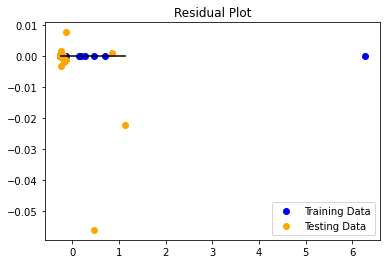

In [18]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictionslen = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [19]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictionslen)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0002648511657258555, R2: 0.9987139423407406


In [20]:
predictionslen
predictionlen1=model.predict(X_train)
y_train
pd1=predictionlen1.astype(int)
y_train, pd1

(array([[2.00000e+00],
        [3.45000e+02],
        [3.75000e+02],
        [1.55000e+02],
        [5.00000e+00],
        [2.00000e+02],
        [5.00000e+00],
        [6.70000e+01],
        [2.50000e+02],
        [2.20000e+02],
        [2.00000e+01],
        [3.90000e+02],
        [1.79141e+03],
        [5.00000e-01],
        [1.55000e+03],
        [3.50000e+01],
        [3.65000e+02],
        [1.00000e+00],
        [2.00000e+00],
        [1.40000e+03],
        [1.47500e+03],
        [0.00000e+00],
        [1.55000e+02],
        [6.00000e+01],
        [0.00000e+00],
        [2.22500e+04],
        [0.00000e+00],
        [7.00000e+01],
        [9.00000e+00],
        [2.00000e+01],
        [4.00000e+01],
        [2.50000e+02],
        [7.80000e+01],
        [3.30000e+03],
        [6.50000e+01],
        [0.00000e+00],
        [1.00000e+00],
        [2.45000e+03],
        [3.00000e+00],
        [3.00000e+02],
        [1.00000e+01],
        [9.00000e+00]]),
 array([[    1],
        [  342]

In [21]:
X_train2018= df_consumption[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']]
predictionlen2=model.predict(X_train2018).astype(int)

In [22]:
df_consumption=df_consumption.rename(columns={"domestic_consumption": "Country"}, errors="raise")

In [23]:
df_consumption

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,20.000,30.000,35.000,20.000,25.000,10.000,20.000,40.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.0000,30.000,30.000
1,Bolivia (Plurinational State of),25.000,27.000,27.500,28.500,29.500,30.500,31.500,32.500,33.000,...,46.000,47.500,49.000,50.500,52.000,53.500,55.000,57.0000,58.500,60.000
2,Brazil,8200.000,8500.000,8900.000,9100.000,9300.000,10100.000,11000.000,11500.000,12200.000,...,18390.000,19132.000,19720.000,20330.000,20085.000,20333.000,20508.000,21225.0000,21997.000,22250.000
3,Burundi,2.000,1.600,1.700,1.910,2.000,2.000,2.000,2.000,2.000,...,1.399,2.000,2.000,2.000,2.000,2.000,2.000,2.0000,2.000,2.000
4,Ecuador,350.000,350.000,350.000,350.000,350.000,350.000,300.000,300.000,300.000,...,150.000,150.000,150.000,150.000,155.000,155.000,155.000,155.0000,155.000,155.000
5,Indonesia,1242.000,1280.000,1319.000,1359.000,1400.000,1443.000,1486.000,1532.000,1578.000,...,3333.000,3333.000,3667.000,3900.000,4250.000,4417.000,4550.000,4650.0000,4750.000,4800.000
6,Madagascar,350.000,300.000,350.000,360.000,166.666,167.000,167.000,167.000,167.000,...,467.000,467.000,450.000,430.000,410.000,390.000,370.000,360.0000,365.000,375.000
7,Malawi,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.000,1.000
8,Papua New Guinea,3.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,1.000,...,2.000,1.430,1.236,1.711,2.039,1.924,1.800,2.0000,2.000,2.000
9,Paraguay,15.000,15.000,15.000,20.000,20.000,20.000,20.000,20.000,20.000,...,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.0000,20.000,20.000


In [24]:
df_consumption.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,348.378768,361.216018,374.133071,376.748321,381.431536,403.617357,419.867679,433.411429,448.510589,459.664375,...,710.721857,747.467679,773.937179,799.169875,812.658464,833.315982,849.075000,865.860186,889.157429,901.958107
std,1125.643104,1162.474584,1217.037181,1241.586526,1269.362484,1375.387465,1493.907631,1559.898821,1651.773033,1719.932840,...,2518.169586,2621.676526,2704.583606,2790.084765,2773.346037,2815.019516,2845.100866,2940.267992,3043.713379,3081.604616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.916750,2.916750,2.750000,2.750000,2.750000,2.750000,3.000000,3.000000,2.750000,...,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000
50%,31.000000,42.875000,42.875000,36.500000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,58.500000,58.500000,62.975000,69.350000,70.233500,71.158500,71.500000,72.000000,72.500000,68.500000
75%,214.750000,267.825000,262.500000,277.750000,271.000000,288.883750,298.137000,300.000000,300.000000,247.500000,...,317.750000,340.000000,342.500000,348.750000,342.500000,361.250000,366.250000,345.000000,356.250500,367.500000
max,8200.000000,8500.000000,8900.000000,9100.000000,9300.000000,10100.000000,11000.000000,11500.000000,12200.000000,12700.000000,...,18390.000000,19132.000000,19720.000000,20330.000000,20085.000000,20333.000000,20508.000000,21225.000000,21997.000000,22250.000000


In [25]:
df_consumption["2021"]=predictionlen2
df_consumption

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2021
0,Angola,20.000,30.000,35.000,20.000,25.000,10.000,20.000,40.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.0000,30.000,30.000,33
1,Bolivia (Plurinational State of),25.000,27.000,27.500,28.500,29.500,30.500,31.500,32.500,33.000,...,47.500,49.000,50.500,52.000,53.500,55.000,57.0000,58.500,60.000,59
2,Brazil,8200.000,8500.000,8900.000,9100.000,9300.000,10100.000,11000.000,11500.000,12200.000,...,19132.000,19720.000,20330.000,20085.000,20333.000,20508.000,21225.0000,21997.000,22250.000,22375
3,Burundi,2.000,1.600,1.700,1.910,2.000,2.000,2.000,2.000,2.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.0000,2.000,2.000,1
4,Ecuador,350.000,350.000,350.000,350.000,350.000,350.000,300.000,300.000,300.000,...,150.000,150.000,150.000,155.000,155.000,155.000,155.0000,155.000,155.000,153
5,Indonesia,1242.000,1280.000,1319.000,1359.000,1400.000,1443.000,1486.000,1532.000,1578.000,...,3333.000,3667.000,3900.000,4250.000,4417.000,4550.000,4650.0000,4750.000,4800.000,4757
6,Madagascar,350.000,300.000,350.000,360.000,166.666,167.000,167.000,167.000,167.000,...,467.000,450.000,430.000,410.000,390.000,370.000,360.0000,365.000,375.000,374
7,Malawi,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,0
8,Papua New Guinea,3.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,1.000,...,1.430,1.236,1.711,2.039,1.924,1.800,2.0000,2.000,2.000,1
9,Paraguay,15.000,15.000,15.000,20.000,20.000,20.000,20.000,20.000,20.000,...,20.000,20.000,20.000,20.000,20.000,20.000,20.0000,20.000,20.000,19


In [26]:
df_consumption.set_index('Country')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2021
Country,,,,,,,,,,,,,,,,,,,,,
Angola,20.000,30.000,35.000,20.000,25.000,10.000,20.000,40.000,30.000,20.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.0000,30.000,30.000,33
Bolivia (Plurinational State of),25.000,27.000,27.500,28.500,29.500,30.500,31.500,32.500,33.000,34.000,...,47.500,49.000,50.500,52.000,53.500,55.000,57.0000,58.500,60.000,59
Brazil,8200.000,8500.000,8900.000,9100.000,9300.000,10100.000,11000.000,11500.000,12200.000,12700.000,...,19132.000,19720.000,20330.000,20085.000,20333.000,20508.000,21225.0000,21997.000,22250.000,22375
Burundi,2.000,1.600,1.700,1.910,2.000,2.000,2.000,2.000,2.000,2.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.0000,2.000,2.000,1
Ecuador,350.000,350.000,350.000,350.000,350.000,350.000,300.000,300.000,300.000,230.000,...,150.000,150.000,150.000,155.000,155.000,155.000,155.0000,155.000,155.000,153
Indonesia,1242.000,1280.000,1319.000,1359.000,1400.000,1443.000,1486.000,1532.000,1578.000,1626.000,...,3333.000,3667.000,3900.000,4250.000,4417.000,4550.000,4650.0000,4750.000,4800.000,4757
Madagascar,350.000,300.000,350.000,360.000,166.666,167.000,167.000,167.000,167.000,56.000,...,467.000,450.000,430.000,410.000,390.000,370.000,360.0000,365.000,375.000,374
Malawi,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,0
Papua New Guinea,3.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,...,1.430,1.236,1.711,2.039,1.924,1.800,2.0000,2.000,2.000,1


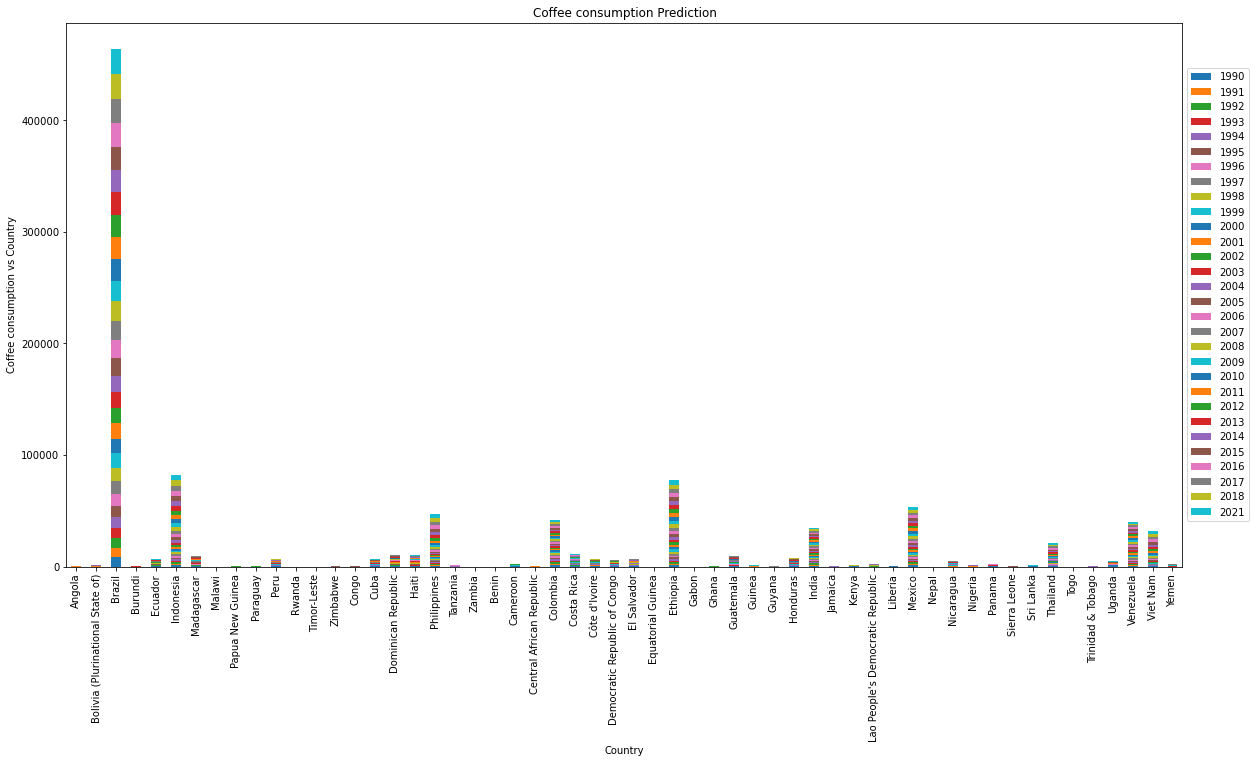

In [38]:
df_consumption.plot(kind='bar', stacked =True, x='Country', figsize=(20, 10))
plt.title("Coffee consumption Prediction")
plt.xlabel("Country")
plt.ylabel("Coffee consumption vs Country")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [28]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0007961984737469245, R2: 0.9961338393861828


C:\Users\ryoun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008532909619038753, tolerance: 0.0042000000000000015
  model = cd_fast.enet_coordinate_descent(


In [29]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0001810257100105299, R2: 0.9991209798898039


In [30]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")



MSE: 0.0007713321886060988, R2: 0.9962545844709743


C:\Users\ryoun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010007003179031183, tolerance: 0.0042000000000000015
  model = cd_fast.enet_coordinate_descent(
